In [1]:
import pandas as pd

# باز کردن فایل
df = pd.read_csv('house-votes-84.csv')

# نمایش اطلاعات اولیه
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Class Name                               435 non-null    object
 1    handicapped-infants                     435 non-null    object
 2    water-project-cost-sharing              435 non-null    object
 3    adoption-of-the-budget-resolution       435 non-null    object
 4    physician-fee-freeze                    435 non-null    object
 5    el-salvador-aid                         435 non-null    object
 6    religious-groups-in-schools             435 non-null    object
 7    anti-satellite-test-ban                 435 non-null    object
 8    aid-to-nicaraguan-contras               435 non-null    object
 9    mx-missile                              435 non-null    object
 10   immigration                             435 non-null    objec

In [2]:
from sklearn.impute import SimpleImputer

# ستون‌های کیفی با مقادیر NULL
categorical_columns_with_null = [
    ' handicapped-infants', ' water-project-cost-sharing', ' adoption-of-the-budget-resolution',
    ' physician-fee-freeze', ' el-salvador-aid', ' religious-groups-in-schools', ' anti-satellite-test-ban',
    ' aid-to-nicaraguan-contras', ' mx-missile', ' immigration', ' synfuels-corporation-cutback',
    ' education-spending', ' superfund-right-to-sue', ' crime', ' duty-free-exports', ' export-administration-act-south-africa'
]

# ایجاد یک SimpleImputer با استراتژی مد (most frequent)
imputer_categorical = SimpleImputer(strategy='most_frequent')

# پر کردن مقادیر NULL در ستون‌های کیفی با مد
df[categorical_columns_with_null] = df[categorical_columns_with_null].replace('?', df[categorical_columns_with_null].mode().iloc[0])


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# تقسیم داده به دیتاست آموزش و تست
X = df_encoded.drop(['Class Name_republican', 'Class Name_democrat'], axis=1)

# ساخت مدل درخت تصمیم برای Class Name_democrat
y_democrat = df_encoded['Class Name_democrat']
X_train_democrat, X_test_democrat, y_train_democrat, y_test_democrat = train_test_split(X, y_democrat, test_size=0.2, random_state=42)

dt_model_democrat = DecisionTreeClassifier(random_state=42)
dt_model_democrat.fit(X_train_democrat, y_train_democrat)

# پیش‌بینی بر روی داده‌های آموزش و تست برای Class Name_democrat
y_train_pred_democrat = dt_model_democrat.predict(X_train_democrat)
y_test_pred_democrat = dt_model_democrat.predict(X_test_democrat)

# ارزیابی مدل برای Class Name_democrat
print("\nAccuracy on training set (Class Name_democrat):", accuracy_score(y_train_democrat, y_train_pred_democrat))
print("Accuracy on test set (Class Name_democrat):", accuracy_score(y_test_democrat, y_test_pred_democrat))
print("\nClassification Report (Class Name_democrat):\n", classification_report(y_test_democrat, y_test_pred_democrat))
print("\nConfusion Matrix (Class Name_democrat):\n", confusion_matrix(y_test_democrat, y_test_pred_democrat))


Accuracy on training set (Class Name_democrat): 0.9942528735632183
Accuracy on test set (Class Name_democrat): 0.9540229885057471

Classification Report (Class Name_democrat):
               precision    recall  f1-score   support

       False       0.94      0.94      0.94        31
        True       0.96      0.96      0.96        56

    accuracy                           0.95        87
   macro avg       0.95      0.95      0.95        87
weighted avg       0.95      0.95      0.95        87


Confusion Matrix (Class Name_democrat):
 [[29  2]
 [ 2 54]]


In [3]:
df.head(10)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,y,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,n,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y


In [4]:
# انجام One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns_with_null)

# One-Hot Encoding بر روی ستون "Class Name"
df_encoded = pd.get_dummies(df_encoded, columns=['Class Name'])

# df_encoded.replace({True: 1, False: 0}, inplace=True)

# نمایش نتیجه
df_encoded.head(10)

,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y,Class Name_democrat,Class Name_republican
0,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,True,False,False,True,False,True
1,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,True,False,False,True,False,True
2,True,False,False,True,False,True,True,False,False,True,...,False,True,False,True,True,False,True,False,True,False
3,True,False,False,True,False,True,True,False,False,True,...,False,True,True,False,True,False,False,True,True,False
4,False,True,False,True,False,True,True,False,False,True,...,False,True,False,True,False,True,False,True,True,False
5,True,False,False,True,False,True,True,False,False,True,...,False,True,False,True,False,True,False,True,True,False
6,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,False,True,True,False
7,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,True,False,False,True,False,True
8,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,True,False,False,True,False,True
9,False,True,False,True,False,True,True,False,True,False,...,True,False,True,False,True,False,False,True,True,False


In [32]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# # تبدیل دیتافریم به نوع داده bool
# df_encoded = df_encoded.astype(bool)

# حداقل support
min_support = 0.5

# اجرای الگوریتم Apriori
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# حداقل confidence
min_confidence = 0.9

# استخراج قوانین انجمن با حداقل confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# نمایش قوانین
for index, rule in rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])  
    # شرط بررسی وجود 'Class Name_democrat' در consequents
    if 'Class Name_democrat' in consequents:
        print(f"{antecedents} ----> {consequents}")
        print("\n")


[' adoption-of-the-budget-resolution_y'] ----> ['Class Name_democrat']


[' physician-fee-freeze_n'] ----> ['Class Name_democrat']


[' adoption-of-the-budget-resolution_y', ' physician-fee-freeze_n'] ----> ['Class Name_democrat']


[' aid-to-nicaraguan-contras_y', ' physician-fee-freeze_n'] ----> ['Class Name_democrat']


[' education-spending_n', ' physician-fee-freeze_n'] ----> ['Class Name_democrat']


[' export-administration-act-south-africa_y', ' physician-fee-freeze_n'] ----> ['Class Name_democrat']


[' physician-fee-freeze_n'] ----> [' export-administration-act-south-africa_y', 'Class Name_democrat']


[' export-administration-act-south-africa_y', ' adoption-of-the-budget-resolution_y', ' physician-fee-freeze_n'] ----> ['Class Name_democrat']


[' export-administration-act-south-africa_y', ' physician-fee-freeze_n'] ----> ['Class Name_democrat', ' adoption-of-the-budget-resolution_y']


[' adoption-of-the-budget-resolution_y', ' physician-fee-freeze_n'] ----> [' export-admini

<Figure size 1500x1000 with 0 Axes>

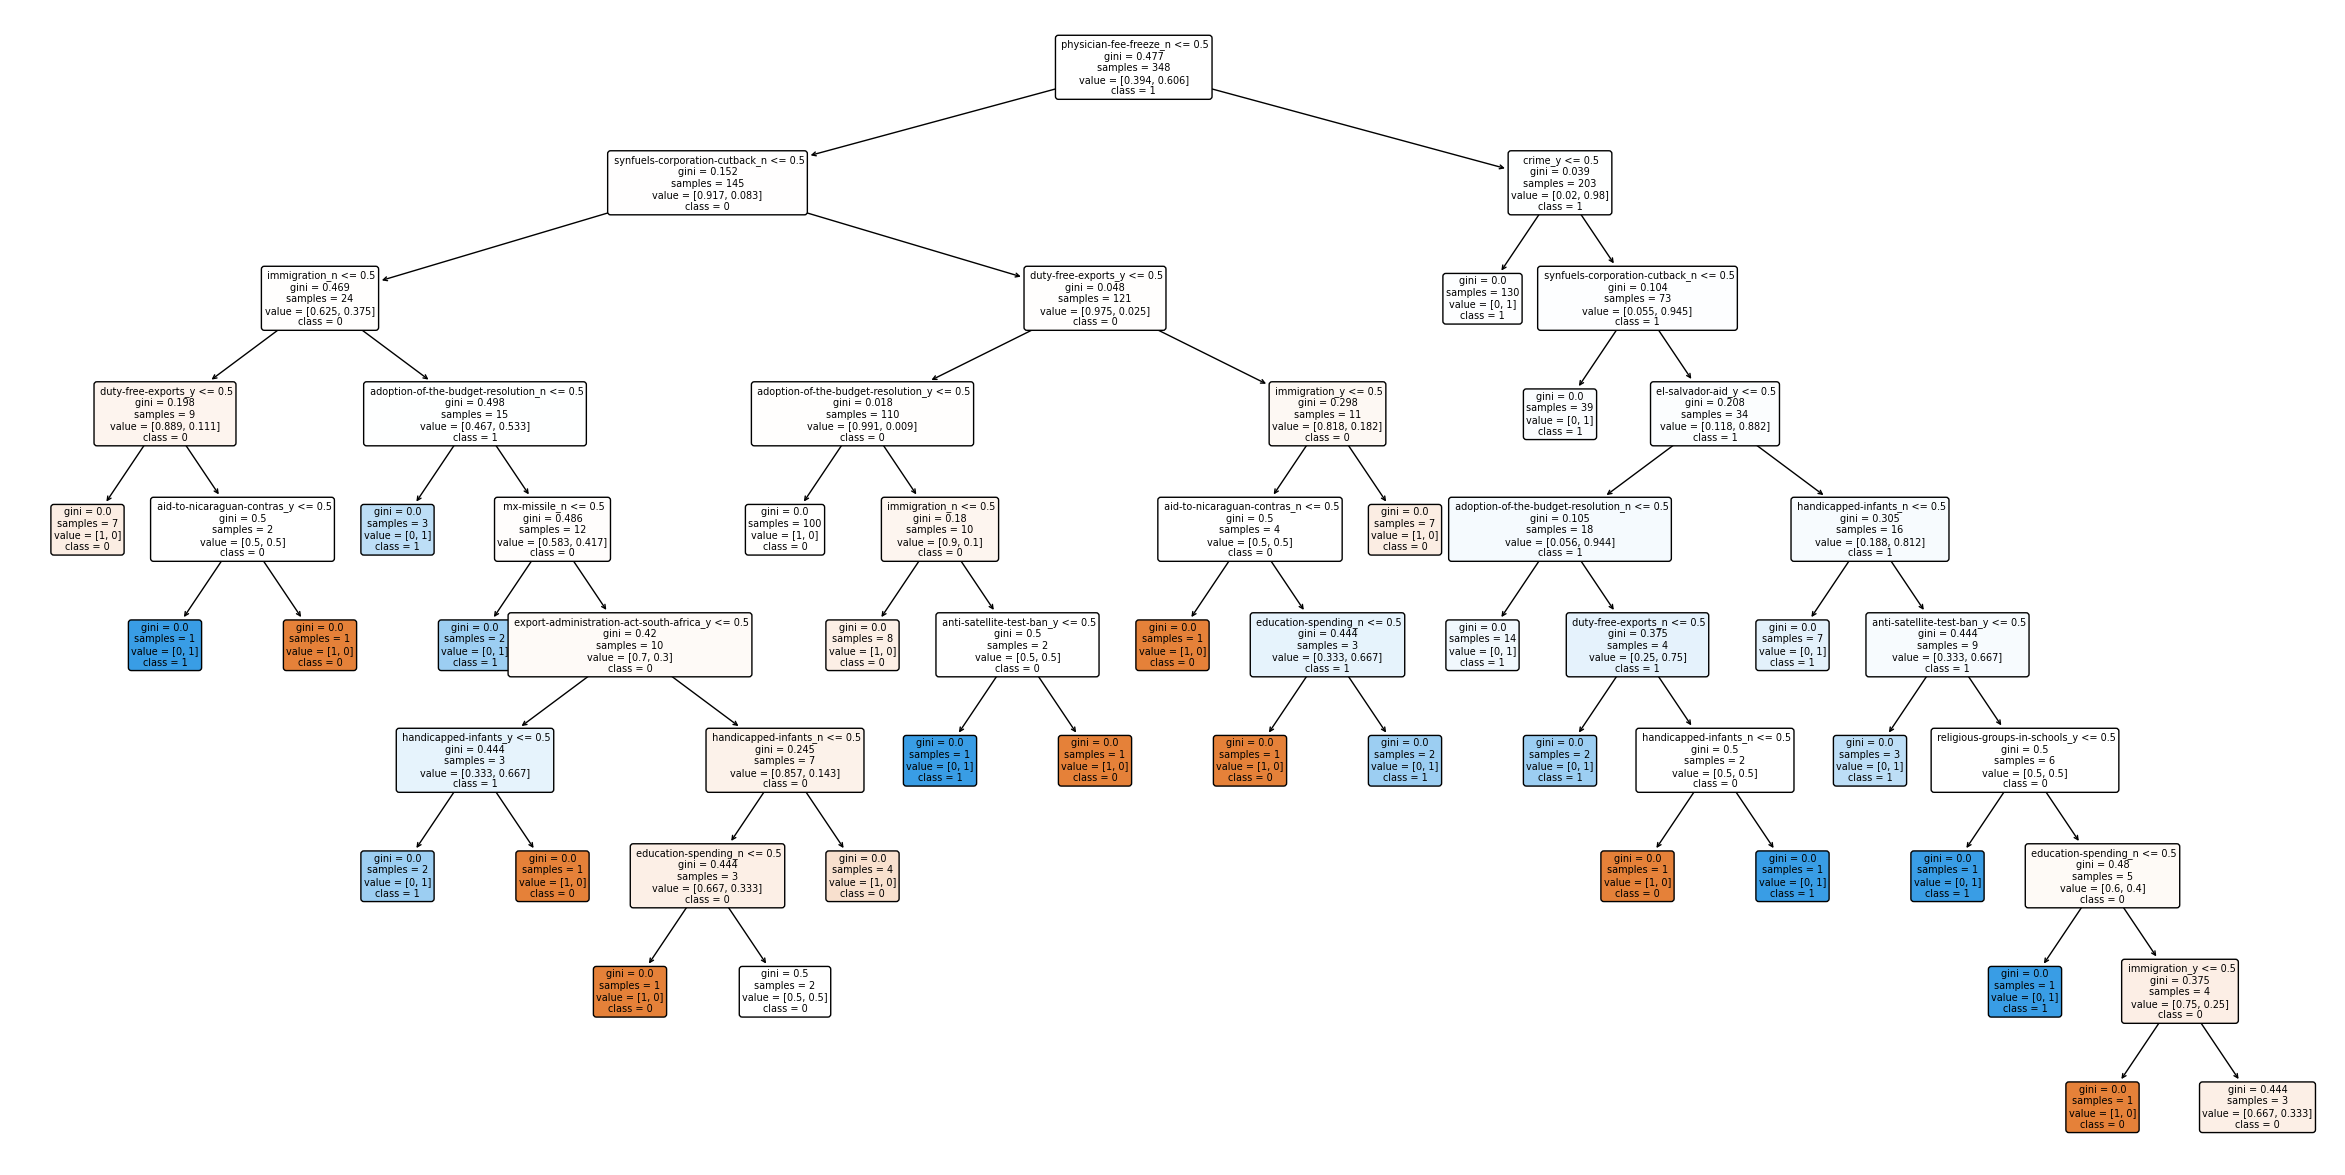

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# ست کردن سایز تصویر
plt.figure(figsize=(15, 10))

# رسم درخت تصمیم

plt.figure(figsize=(30, 15))
plot_tree(dt_model_democrat, feature_names=list(X.columns), class_names=['0', '1'], filled=True, rounded=True, fontsize=7)

plt.show()


In [26]:
from treeinterpreter import treeinterpreter as ti

# پیش بینی بر روی داده‌های آموزش برای Class Name_democrat
prediction, bias, contributions = ti.predict(dt_model_democrat, X_train_democrat)

# نمایش قوانین از درخت تصمیم
for i in range(len(X_train_democrat)):
    if contributions.any:  # مثبت بودن کمک به کلاس 'Class Name_democrat'
        print(f"Rule {i + 1}: If {X_train_democrat.iloc[i, :].to_dict()} then Class Name_democrat")
        print("\n")

Rule 1: If {' handicapped-infants_n': True, ' handicapped-infants_y': False, ' water-project-cost-sharing_n': False, ' water-project-cost-sharing_y': True, ' adoption-of-the-budget-resolution_n': True, ' adoption-of-the-budget-resolution_y': False, ' physician-fee-freeze_n': False, ' physician-fee-freeze_y': True, ' el-salvador-aid_n': False, ' el-salvador-aid_y': True, ' religious-groups-in-schools_n': False, ' religious-groups-in-schools_y': True, ' anti-satellite-test-ban_n': False, ' anti-satellite-test-ban_y': True, ' aid-to-nicaraguan-contras_n': True, ' aid-to-nicaraguan-contras_y': False, ' mx-missile_n': True, ' mx-missile_y': False, ' immigration_n': True, ' immigration_y': False, ' synfuels-corporation-cutback_n': False, ' synfuels-corporation-cutback_y': True, ' education-spending_n': False, ' education-spending_y': True, ' superfund-right-to-sue_n': False, ' superfund-right-to-sue_y': True, ' crime_n': False, ' crime_y': True, ' duty-free-exports_n': True, ' duty-free-expo